In [3]:
# IMPORTS
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# **CONFIG BLOCK** (batch size 8 is used)


In [4]:
DATA_DIR = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image" 
IMG_SIZE = (224, 224)
BATCH_SIZE = 8         
EPOCHS = 20
LEARNING_RATE = 0.0001
SPLIT_TRAIN = 0.7
SPLIT_VAL = 0.15
SPLIT_TEST = 0.15

# **DATA PREPROCESSING, MODEL BUILDING AND TRAINING**




In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_VAL + SPLIT_TEST
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=SPLIT_TEST / (SPLIT_VAL + SPLIT_TEST))

val_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# VGG16 FROM SCRATCH
model = Sequential([
    
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(*IMG_SIZE, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

   
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

   
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

   
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

# COMPILE 
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# TRAIN
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)


Found 2433 images belonging to 3 classes.
Found 1738 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763055282.431505      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1763055288.785246     129 service.cc:148] XLA service 0x7b7168003d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763055288.786009     129 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763055289.485265     129 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/305 ━━━━━━━━━━━━━━━━━━━━ 28s 95ms/step - accuracy: 0.1250 - loss: 1.1007   

I0000 00:00:1763055298.510174     129 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.4412 - loss: 0.9995

305/305 ━━━━━━━━━━━━━━━━━━━━ 62s 156ms/step - accuracy: 0.4416 - loss: 0.9990 - val_accuracy: 0.7716 - val_loss: 0.5970
Epoch 2/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7912 - loss: 0.5477

305/305 ━━━━━━━━━━━━━━━━━━━━ 39s 127ms/step - accuracy: 0.7912 - loss: 0.5476 - val_accuracy: 0.8107 - val_loss: 0.4523
Epoch 3/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8072 - loss: 0.4497

305/305 ━━━━━━━━━━━━━━━━━━━━ 39s 129ms/step - accuracy: 0.8073 - loss: 0.4497 - val_accuracy: 0.8613 - val_loss: 0.3721
Epoch 4/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 34s 111ms/step - accuracy: 0.8526 - loss: 0.3729 - val_accuracy: 0.8412 - val_loss: 0.3886
Epoch 5/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8554 - loss: 0.3416

305/305 ━━━━━━━━━━━━━━━━━━━━ 39s 129ms/step - accuracy: 0.8554 - loss: 0.3415 - val_accuracy: 0.8930 - val_loss: 0.2531
Epoch 6/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8757 - loss: 0.3028

305/305 ━━━━━━━━━━━━━━━━━━━━ 39s 127ms/step - accuracy: 0.8757 - loss: 0.3028 - val_accuracy: 0.8987 - val_loss: 0.2539
Epoch 7/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8928 - loss: 0.2731

305/305 ━━━━━━━━━━━━━━━━━━━━ 39s 129ms/step - accuracy: 0.8928 - loss: 0.2731 - val_accuracy: 0.9212 - val_loss: 0.1981
Epoch 8/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 33s 109ms/step - accuracy: 0.9121 - loss: 0.2238 - val_accuracy: 0.8936 - val_loss: 0.2754
Epoch 9/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9125 - loss: 0.2302

305/305 ━━━━━━━━━━━━━━━━━━━━ 40s 130ms/step - accuracy: 0.9125 - loss: 0.2302 - val_accuracy: 0.9235 - val_loss: 0.1908
Epoch 10/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9212 - loss: 0.1973

305/305 ━━━━━━━━━━━━━━━━━━━━ 39s 128ms/step - accuracy: 0.9212 - loss: 0.1973 - val_accuracy: 0.9264 - val_loss: 0.1868
Epoch 11/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9338 - loss: 0.1785

305/305 ━━━━━━━━━━━━━━━━━━━━ 43s 141ms/step - accuracy: 0.9338 - loss: 0.1785 - val_accuracy: 0.9465 - val_loss: 0.1411
Epoch 12/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9441 - loss: 0.1416

305/305 ━━━━━━━━━━━━━━━━━━━━ 47s 152ms/step - accuracy: 0.9441 - loss: 0.1417 - val_accuracy: 0.9580 - val_loss: 0.1270
Epoch 13/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 40s 130ms/step - accuracy: 0.9459 - loss: 0.1444 - val_accuracy: 0.9563 - val_loss: 0.1278
Epoch 14/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9432 - loss: 0.1413

305/305 ━━━━━━━━━━━━━━━━━━━━ 45s 146ms/step - accuracy: 0.9433 - loss: 0.1413 - val_accuracy: 0.9718 - val_loss: 0.0744
Epoch 15/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9642 - loss: 0.0908

305/305 ━━━━━━━━━━━━━━━━━━━━ 39s 128ms/step - accuracy: 0.9642 - loss: 0.0908 - val_accuracy: 0.9879 - val_loss: 0.0425
Epoch 16/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 33s 107ms/step - accuracy: 0.9710 - loss: 0.0718 - val_accuracy: 0.9747 - val_loss: 0.0936
Epoch 17/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 33s 108ms/step - accuracy: 0.9750 - loss: 0.0835 - val_accuracy: 0.9810 - val_loss: 0.0521
Epoch 18/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 33s 108ms/step - accuracy: 0.9746 - loss: 0.0669 - val_accuracy: 0.9741 - val_loss: 0.0675


# **EVALUATION AND METRICS**


218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.8986 - loss: 0.2712

 Test Accuracy: 92.86%
 Test Loss: 0.2094
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step

========== Classification Report ==========
                 precision    recall  f1-score   support

   Lung_Opacity     0.8981    0.9093    0.9036       562
         Normal     0.9084    0.9200    0.9141       625
Viral Pneumonia     0.9850    0.9582    0.9714       550

       accuracy                         0.9286      1737
      macro avg     0.9305    0.9291    0.9297      1737
   weighted avg     0.9293    0.9286    0.9289      1737



<Figure size 800x600 with 0 Axes>

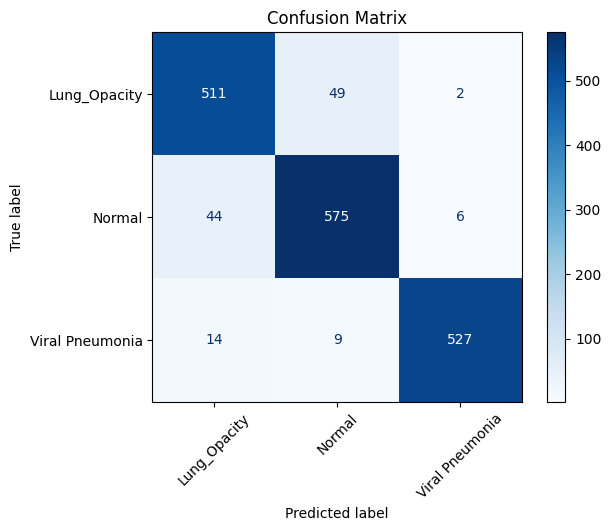

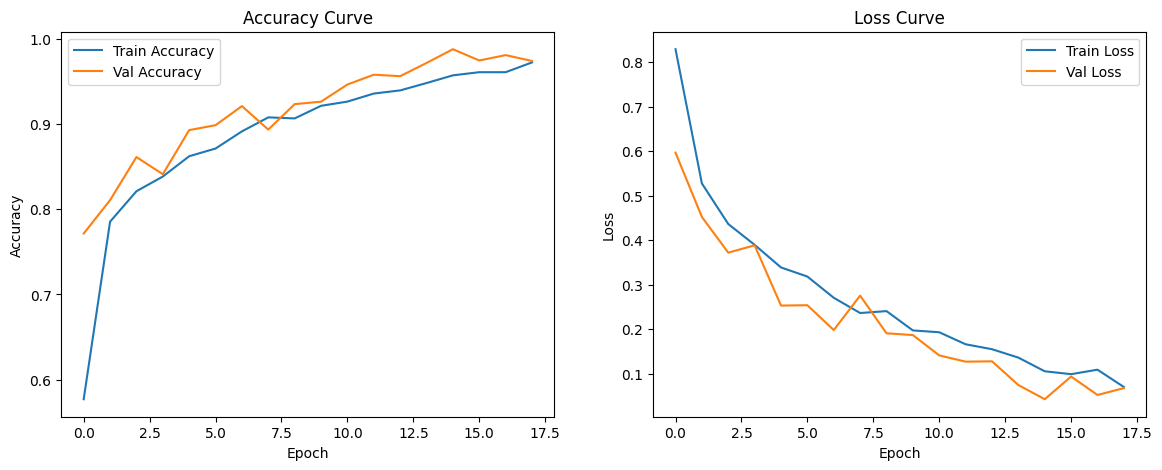

In [6]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# METRICS: CONFUSION MATRIX, PRECISION, RECALL, F1 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
Y_true = test_gen.classes
Y_pred_probs = model.predict(test_gen)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Labels (class names)
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("\n========== Classification Report ==========")
print(classification_report(Y_true, Y_pred, target_names=class_labels, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# PLOTS 
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# [](http://)**CONFIG BLOCK** (batch size 16 is used)


In [7]:
DATA_DIR = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image"
IMG_SIZE = (224, 224)
BATCH_SIZE = 16         
EPOCHS = 20
LEARNING_RATE = 0.0001
SPLIT_TRAIN = 0.7
SPLIT_VAL = 0.15
SPLIT_TEST = 0.15

# **DATA PREPROCESSING, MODEL BUILDING AND TRAINING**



In [8]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_VAL + SPLIT_TEST
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=SPLIT_TEST / (SPLIT_VAL + SPLIT_TEST))

val_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

#  VGG16 FROM SCRATCH 
model = Sequential([
    
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(*IMG_SIZE, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

   
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

  
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),


    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

#  COMPILE 
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#  TRAIN 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)


Found 2433 images belonging to 3 classes.
Found 1738 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.4162 - loss: 1.0268

153/153 ━━━━━━━━━━━━━━━━━━━━ 60s 283ms/step - accuracy: 0.4171 - loss: 1.0258 - val_accuracy: 0.7975 - val_loss: 0.4963
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.7863 - loss: 0.5439

153/153 ━━━━━━━━━━━━━━━━━━━━ 32s 207ms/step - accuracy: 0.7864 - loss: 0.5437 - val_accuracy: 0.8446 - val_loss: 0.3858
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.8254 - loss: 0.4324

153/153 ━━━━━━━━━━━━━━━━━━━━ 32s 207ms/step - accuracy: 0.8255 - loss: 0.4322 - val_accuracy: 0.8636 - val_loss: 0.3429
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.8565 - loss: 0.3683

153/153 ━━━━━━━━━━━━━━━━━━━━ 31s 205ms/step - accuracy: 0.8564 - loss: 0.3685 - val_accuracy: 0.8682 - val_loss: 0.3273
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.8662 - loss: 0.3596

153/153 ━━━━━━━━━━━━━━━━━━━━ 31s 205ms/step - accuracy: 0.8663 - loss: 0.3594 - val_accuracy: 0.8953 - val_loss: 0.2668
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 168ms/step - accuracy: 0.8760 - loss: 0.3114 - val_accuracy: 0.8872 - val_loss: 0.3250
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9059 - loss: 0.2471

153/153 ━━━━━━━━━━━━━━━━━━━━ 31s 205ms/step - accuracy: 0.9058 - loss: 0.2473 - val_accuracy: 0.9120 - val_loss: 0.2290
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 167ms/step - accuracy: 0.8967 - loss: 0.2613 - val_accuracy: 0.9010 - val_loss: 0.2385
Epoch 9/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9040 - loss: 0.2389

153/153 ━━━━━━━━━━━━━━━━━━━━ 31s 204ms/step - accuracy: 0.9040 - loss: 0.2390 - val_accuracy: 0.9338 - val_loss: 0.1707
Epoch 10/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9173 - loss: 0.2130

153/153 ━━━━━━━━━━━━━━━━━━━━ 31s 204ms/step - accuracy: 0.9173 - loss: 0.2130 - val_accuracy: 0.9350 - val_loss: 0.1612
Epoch 11/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 167ms/step - accuracy: 0.9284 - loss: 0.1963 - val_accuracy: 0.8987 - val_loss: 0.2312
Epoch 12/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9333 - loss: 0.1817

153/153 ━━━━━━━━━━━━━━━━━━━━ 31s 204ms/step - accuracy: 0.9333 - loss: 0.1817 - val_accuracy: 0.9430 - val_loss: 0.1494
Epoch 13/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9403 - loss: 0.1594

153/153 ━━━━━━━━━━━━━━━━━━━━ 31s 204ms/step - accuracy: 0.9403 - loss: 0.1595 - val_accuracy: 0.9568 - val_loss: 0.1303
Epoch 14/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 168ms/step - accuracy: 0.9422 - loss: 0.1383 - val_accuracy: 0.9344 - val_loss: 0.1608
Epoch 15/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 172ms/step - accuracy: 0.9473 - loss: 0.1267 - val_accuracy: 0.9499 - val_loss: 0.1181
Epoch 16/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 26s 167ms/step - accuracy: 0.9564 - loss: 0.1137 - val_accuracy: 0.9419 - val_loss: 0.1314
Epoch 17/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9591 - loss: 0.1062

153/153 ━━━━━━━━━━━━━━━━━━━━ 31s 204ms/step - accuracy: 0.9591 - loss: 0.1061 - val_accuracy: 0.9781 - val_loss: 0.0602
Epoch 18/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9708 - loss: 0.0756

153/153 ━━━━━━━━━━━━━━━━━━━━ 32s 212ms/step - accuracy: 0.9708 - loss: 0.0756 - val_accuracy: 0.9827 - val_loss: 0.0466
Epoch 19/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9736 - loss: 0.0711

153/153 ━━━━━━━━━━━━━━━━━━━━ 34s 221ms/step - accuracy: 0.9736 - loss: 0.0712 - val_accuracy: 0.9896 - val_loss: 0.0358
Epoch 20/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 32s 207ms/step - accuracy: 0.9728 - loss: 0.0927 - val_accuracy: 0.9661 - val_loss: 0.0788


# **EVALUATION AND METRICS**



109/109 ━━━━━━━━━━━━━━━━━━━━ 15s 138ms/step - accuracy: 0.8808 - loss: 0.3990

 Test Accuracy: 93.15%
 Test Loss: 0.2361
109/109 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step

========== Classification Report ==========
                 precision    recall  f1-score   support

   Lung_Opacity     0.9301    0.8754    0.9019       562
         Normal     0.8986    0.9360    0.9169       625
Viral Pneumonia     0.9713    0.9836    0.9774       550

       accuracy                         0.9315      1737
      macro avg     0.9333    0.9317    0.9321      1737
   weighted avg     0.9318    0.9315    0.9312      1737



<Figure size 800x600 with 0 Axes>

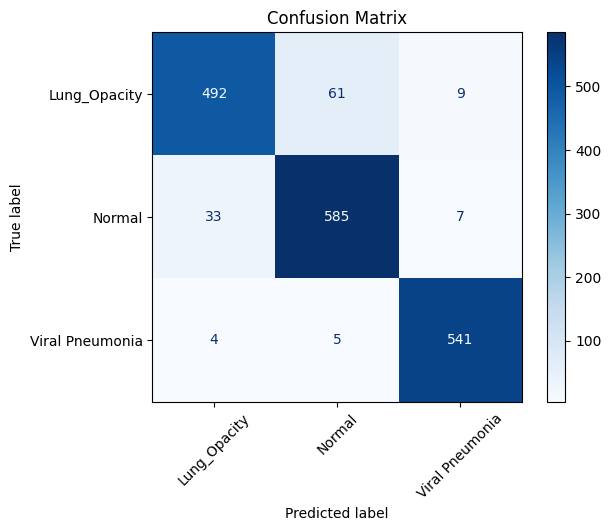

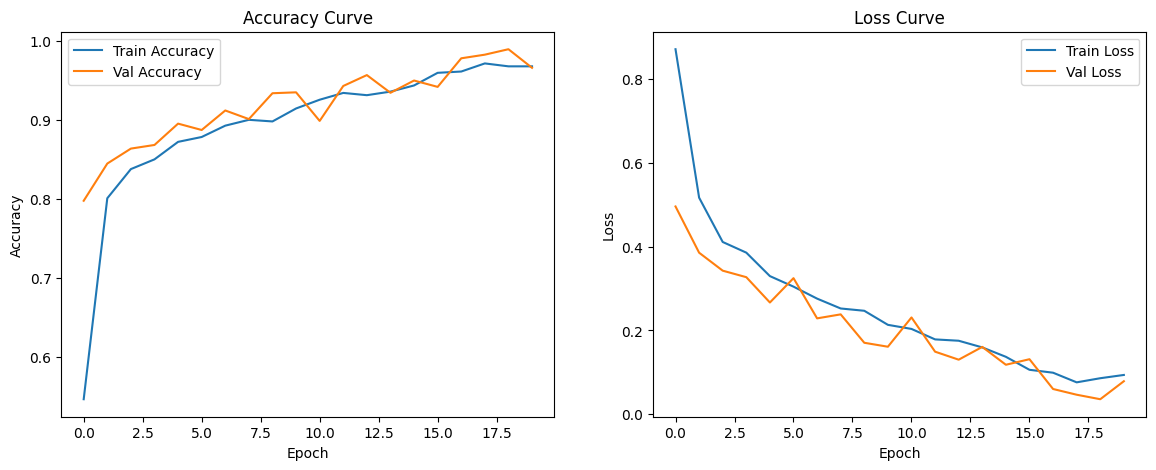

In [9]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# METRICS: CONFUSION MATRIX, PRECISION, RECALL, F1 Score 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
Y_true = test_gen.classes
Y_pred_probs = model.predict(test_gen)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Labels (class names)
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("\n========== Classification Report ==========")
print(classification_report(Y_true, Y_pred, target_names=class_labels, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.show()

#  PLOTS 
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()